In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import operator

## I HAVEF TO WORK ON THIS
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


## Data

In [2]:
csv_path = r"C:\Users\sofia.martinez_bluet\Downloads\bottle.csv"

# Verificar si el archivo existe en la ruta especificada
if os.path.exists(csv_path):
    # Leer el archivo CSV
    data = pd.read_csv(csv_path)
    # Mostrar las primeras filas del DataFrame para verificar
    print(data.head())
else:
    print(f"El archivo {csv_path} no se encuentra en la ruta especificada.")

   Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
0        1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0000A-3   
1        1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0008A-3   
2        1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0010A-7   
3        1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0019A-3   
4        1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0020A-7   

   Depthm  T_degC  Salnty  O2ml_L  STheta  O2Sat  ...  R_PHAEO  R_PRES  \
0       0   10.50  33.440     NaN  25.649    NaN  ...      NaN       0   
1       8   10.46  33.440     NaN  25.656    NaN  ...      NaN       8   
2      10   10.46  33.437     NaN  25.654    NaN  ...      NaN      10   
3      19   10.45  33.420     NaN  25.643    NaN  ...      NaN      19   
4      20   10.45  33.421     NaN  25.643    NaN  ...      NaN      20   

   R_SAMP  DIC1  DIC2  TA1  TA2  pH2  pH1  DIC Quality Comment  
0     NaN   NaN   NaN  NaN  NaN  

In [3]:
data.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
count,500.000000,500.000000,500.000000,499.000000,494.000000,0.0,493.000000,0.0,0.0,0.0,...,0.0,500.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,8.548000,250.500000,341.490000,7.850421,33.628842,NaN,26.183400,NaN,NaN,NaN,...,NaN,344.114000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.570062,144.481833,355.166886,2.911584,0.560411,NaN,0.846325,NaN,NaN,NaN,...,NaN,358.371094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,0.000000,2.780000,32.630000,NaN,24.870000,NaN,NaN,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.000000,125.750000,55.000000,5.030000,33.071000,NaN,25.259000,NaN,NaN,NaN,...,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.000000,250.500000,200.000000,8.180000,33.799500,NaN,26.339000,NaN,NaN,NaN,...,NaN,201.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,12.250000,375.250000,598.500000,10.450000,34.130000,NaN,26.983000,NaN,NaN,NaN,...,NaN,603.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,16.000000,500.000000,1352.000000,12.660000,34.450000,NaN,27.450000,NaN,NaN,NaN,...,NaN,1365.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Extract 2 columns 'T_degC','Salnty' for pure and better showing
data_df = data[['T_degC','Salnty']]
# And called again
data_df.columns = ['Temperature', 'Salinity']

bottle_df = data_df[:][:500]      # lets take limit for speed regression calculating
bottle_df.head()

,Temperature,Salinity
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


### Preprocessing

In [5]:
# see how many null values we have
bottle_df.isnull().sum()

Temperature    1
Salinity       6
dtype: int64

In [6]:

# Drop NaN or missing input numbers

bottle_df.fillna(method='ffill', inplace=True)
#bottle_df.isnull().sum()
# Features chose

X = np.array(bottle_df['Salinity']).reshape(-1, 1)
y = np.array(bottle_df['Temperature']).reshape(-1, 1)
# Split data as %20 is test and %80 is train set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

## Multiple Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

mlin_df = LinearRegression()
mlin_df = mlin_df.fit(X_train, y_train)
mlin_df.intercept_       # constant b0
mlin_df.coef_            # variable coefficient


dt_predict = mlin_df.predict(X_test)        

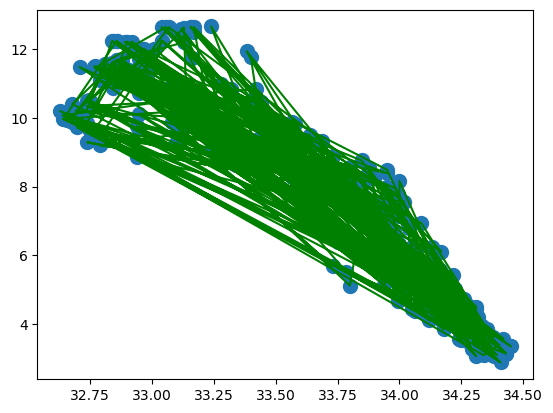

In [8]:
##### VISUALIZATION ###

# Finally draw figure of Multiple Linear Regression Model

plt.scatter(X_train, y_train, s=100)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_train,dt_predict), key=sort_axis)
X_test, dt_predict = zip(*sorted_zip)
plt.plot(X_train, y_train, color='g')
plt.show()

In [9]:
####### MEASURES ######

from tabulate import tabulate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression metrics
mae = mean_absolute_error(y_test, dt_predict)
mse = mean_squared_error(y_test, dt_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, dt_predict)

# Create a table
table = [["Mean Absolute Error (MAE)", mae],
         ["Mean Squared Error (MSE)", mse],
         ["Root Mean Squared Error (RMSE)", rmse],
         ["Coefficient of Determination (R²)", r2]]

# Print the table
print(tabulate(table, headers=["Metric", "Value"], tablefmt="fancy_grid"))

╒═══════════════════════════════════╤═══════════╕
│ Metric                            │     Value │
╞═══════════════════════════════════╪═══════════╡
│ Mean Absolute Error (MAE)         │  2.9464   │
├───────────────────────────────────┼───────────┤
│ Mean Squared Error (MSE)          │ 13.4464   │
├───────────────────────────────────┼───────────┤
│ Root Mean Squared Error (RMSE)    │  3.66694  │
├───────────────────────────────────┼───────────┤
│ Coefficient of Determination (R²) │ -0.626364 │
╘═══════════════════════════════════╧═══════════╛


### Multiple Linear Regression Model Tunning

In [16]:
cross_val_score(mlin_df, X, y, cv=10, scoring = 'r2').mean()

0.28656909541068387

In [23]:
####### MEASURES ######

print(mlin_df.score(X_train, y_train)  )    # r2 value

print(np.sqrt(-cross_val_score(mlin_df, 
                X_train, 
                y_train, 
                cv=10, 
                scoring = 'neg_mean_squared_error')).mean())

0.5308236835516111
2.6036440372408167
